In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os

In [2]:
PATH = os.path.join('KeyPoint_Data/')
actions = np.array(os.listdir(PATH))
label_map={label:num for num,label in enumerate(actions)}
print(label_map)

{'eat': 0, 'hello': 1, 'help': 2, 'no': 3, 'please': 4, 'thanks': 5, 'what': 6, 'yes': 7}


In [3]:
act_len=len(actions)
no_sequences = 30 #30 vids for each action
sequence_length = 30# each vid 30 frame length

In [4]:
feat,labels = [],[]
for act in actions:
    for seq in range(no_sequences):
        window=[]
        for frame in range(sequence_length):
            res = np.load(os.path.join(PATH,act,str(seq),f"{frame}.npy"))
            window.append(res)
        feat.append(window)
        labels.append(label_map[act])

In [5]:
X=np.array(feat)
y=to_categorical(labels).astype(int)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=5)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=5)

In [7]:
print(Xtrain.shape,Xtest.shape)

(153, 30, 258) (48, 30, 258)


In [8]:
print(ytrain.shape,ytest.shape)

(153, 8) (48, 8)


In [9]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [18]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\Sidhant Saxena\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │          82,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 237,416 (927.41 KB)

 Trainable params: 237,416 (927.41 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history=model.fit(Xtrain,ytrain,epochs=50,validation_data=(Xval, yval))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 355ms/step - categorical_accuracy: 0.1625 - loss: 2.0641 - val_categorical_accuracy: 0.1282 - val_loss: 1.9428
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - categorical_accuracy: 0.1564 - loss: 1.8956 - val_categorical_accuracy: 0.3077 - val_loss: 1.9458
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - categorical_accuracy: 0.3347 - loss: 1.8696 - val_categorical_accuracy: 0.2564 - val_loss: 1.6008
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.3316 - loss: 1.6582 - val_categorical_accuracy: 0.3077 - val_loss: 1.7459
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - categorical_accuracy: 0.3777 - loss: 1.7345 - val_categorical_accuracy: 0.4359 - val_loss: 1.6510
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.5515 - loss: 1.5483 - val_categorical_accuracy: 0.3077 - val_loss: 1.5811
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - categorical_accuracy: 0.3994 - loss: 1.5077 - val_cat

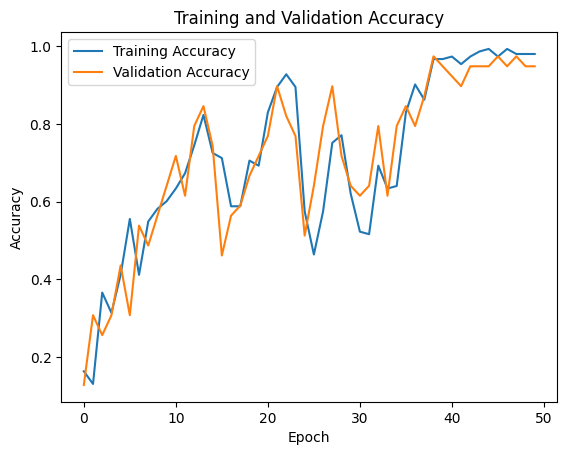

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [27]:
yhat = model.predict(Xtest)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [28]:
ytrue = np.argmax(ytest, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytrue, yhat)

0.9791666666666666

In [30]:
import keras
keras.models.save_model(model,filepath='Model/model_gestures.h5')

In [31]:
cm = confusion_matrix(ytrue,yhat)

<Axes: >

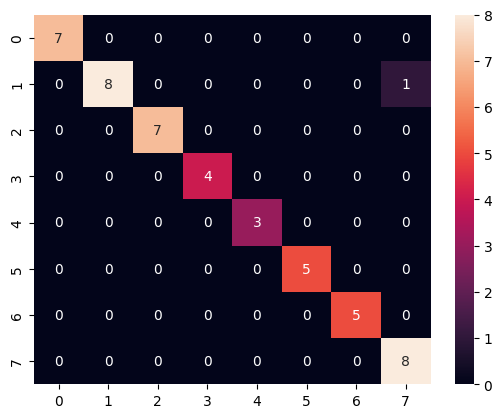

In [32]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [33]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("recall:",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# print("true neg rate:",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
# print("Neg pred value:",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out:",FPR)
# False negative rate
FNR = FN/(TP+FN)
# print("False neg rate;",FNR)
# False discovery rate
FDR = FP/(TP+FP)
# print("False discovery rate:",FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",ACC)

recall: [1.         0.88888889 1.         1.         1.         1.
 1.         1.        ]
Precision: [1.         1.         1.         1.         1.         1.
 1.         0.88888889]
Fall out: [0.    0.    0.    0.    0.    0.    0.    0.025]
Accuracy: [1.         0.97916667 1.         1.         1.         1.
 1.         0.97916667]


In [22]:
import numpy as np
import time
import os
import mediapipe as mp
from matplotlib import pyplot as plt
import cv2
from keras.models import load_model

mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utils

def extract_keypoints(result):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in result.pose_landmarks.landmark] if result.pose_landmarks else np.zeros(33*4)).flatten()
    lh = np.array([[res.x,res.y,res.z] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*3)).flatten()
    rh = np.array([[res.x,res.y,res.z] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*3)).flatten()
    return np.concatenate([pose,lh,rh])
    # return rh

def mp_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    res = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,res

def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(142,110,60)),mp_drawing.DrawingSpec(color=(142,110,60)))
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(142,110,60)),mp_drawing.DrawingSpec(color=(142,110,60)))
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(142,110,60)),mp_drawing.DrawingSpec(color=(142,110,60)))    
    return image



sequence = []
sentence = []
predictions = []
threshold = 0.5
val=""
# collections
cap = cv2.VideoCapture(0)
x=0
with mp_holistic.Holistic(min_detection_confidence=0.6,min_tracking_confidence=0.8) as holistic:
    while cap.isOpened():
        #read frame
        success,frame = cap.read()

        #detection         
        image,data = mp_detection(frame,holistic)
        #draw landmark
        image = draw_landmarks(image,data)
        kp = extract_keypoints(data)

        sequence.append(kp)
        sequence = sequence[-15:]
        if len(sequence) == 15:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            val=actions[np.argmax(res)]
            predictions.append(np.argmax(res))
            # if np.unique(predictions[-10:])[0]==np.argmax(res):
            #         if res[np.argmax(res)] > threshold: 
            #             if len(sentence) > 0: 
            #                 if actions[np.argmax(res)] != sentence[-1]:
            #                     sentence.append(actions[np.argmax(res)])
            #             else:
            #                 sentence.append(actions[np.argmax(res)])   
            sequence=[] 
        
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image,val, (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # sentence=[]
        cv2.imshow("Feed",image)

        #breaking/exit feed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()